In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('./fp-historical-wildfire-data-2006-2021.csv')

In [4]:
df.shape

(22914, 50)

<Axes: >

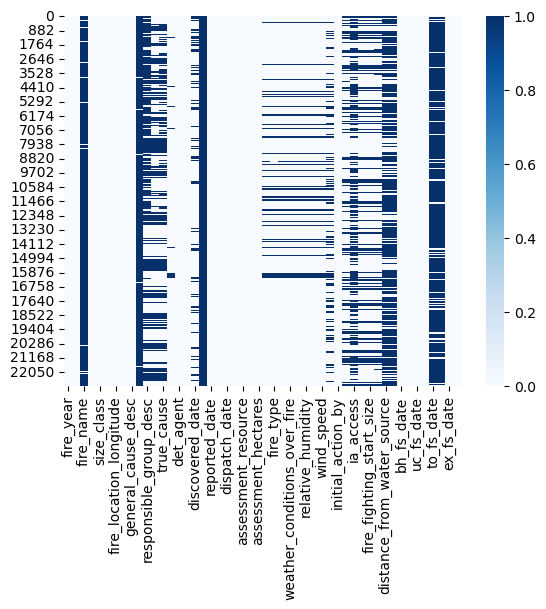

In [5]:
import seaborn as sns
sns.heatmap(df.isna(), cmap='Blues')

In [6]:
nulls = df.isna().sum()
nulls[nulls > 10000].sort_values(ascending=False)

discovered_size               22914
industry_identifier_desc      22506
fire_name                     22310
to_fs_date                    20470
to_hectares                   20470
distance_from_water_source    16549
first_bucket_drop_date        16549
responsible_group_desc        13883
ia_access                     12838
true_cause                    10426
dtype: int64

In [11]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13


In [9]:
df['general_cause_desc'].value_counts()

general_cause_desc
Lightning               7873
Recreation              5239
Resident                3948
Incendiary              1995
Power Line Industry     1177
Undetermined             736
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Under Investigation        2
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px


In [12]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.fire_location_longitude, df.fire_location_latitude))

In [13]:
df_geo.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,geometry
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50,POINT (-119.92697 59.52214)
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01,POINT (-116.11896 52.69226)
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10,POINT (-110.71995 55.93705)
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01,POINT (-111.16075 56.42593)
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13,POINT (-116.05863 53.69345)


In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [18]:
print(world)

       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    M

/Users/moazmahran/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

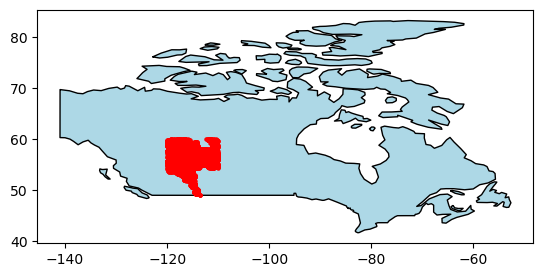

In [20]:
axis = world[world.name == 'Canada'].plot(color='lightblue', edgecolor='black')
df_geo.plot(ax=axis, color='red', markersize=5)

In [101]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13


In [102]:
locationMap = {'C': 'Calgary', 
               'E': 'Edson', 
               'H': 'High Level', 
                'G': 'Grande Prairie',
                'L': 'Lac La Biche',
                'M': 'Fort McMurray',
                'P': 'Peace River',
                'R': 'Rocky',
                'S': 'Slave Lke',
                'W': 'Whitecourt' 
}
df['forest_area'] = df['fire_number'].str[0].map(locationMap)
df['forest_area']

0           High Level
1                Rocky
2         Lac La Biche
3        Fort McMurray
4                Edson
             ...      
22909          Calgary
22910          Calgary
22911          Calgary
22912          Calgary
22913    Fort McMurray
Name: forest_area, Length: 22914, dtype: object

In [103]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,forest_area
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50,High Level
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01,Rocky
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10,Lac La Biche
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01,Fort McMurray
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13,Edson
